In [14]:
%pylab inline
%load_ext autoreload
%autoreload 2
%load_ext Cython

from InstanceVariables import InstanceVariables
import SimulationInstance
import SimulationInstanceVectorized
import Cython_resources.main as sim_cyth

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


Before looking at the results of each simulation instance, both vectorized and not, let us first define the variables used and their values for each. The following parameter values are those used in the Santos, Santos, Pacheco paper supporting material.

As well as this, let us define 4 of the main social norms investigated

In [14]:
SternJudging = [[1, 0 ],
                [0, 1]]
SimpleStanding = [[1, 1],
                  [0, 1]]
Shunning = [[1, 0],
            [0, 1]]
ImageScore = [[1, 1],
              [0, 0]]

Now a function containing all the predefined variables for use in testing:

In [15]:
def SSP(population_size, generations, socialnorm):
    runs = 1
    mutation_rate = np.power(10*population_size, -1)

    execution_error = 0.08
    reputation_assignment_error = 0.01
    private_assessment_error = 0.01
    reputation_update_probability = 1
    cost = 1
    benefit = 5
    SimulationInstance.simulate(runs, generations, population_size,
        mutation_rate, execution_error, reputation_assignment_error, private_assessment_error,
        reputation_update_probability, socialnorm,
        cost, benefit)

# Population optimization #
Now let's have a quick look at the speed difference in a population of 50.

In [15]:
%%timeit
SSP(50, 3*np.power(10,3), SternJudging, optimized=False)

Cooperation index: 0.5537725
Cooperation index: 0.0433275
Cooperation index: 0.78902
Cooperation index: 0.0344675
1 loop, best of 3: 4.73 s per loop


The best case was 4.73 seconds in the unoptimized simulation, now if we test the optimized simulation.

In [14]:
%%timeit
SSP(50, 3*np.power(10,3), SternJudging, optimized=True)

Cooperation index: 0.8683766666666667
Cooperation index: 0.8917341666666667
Cooperation index: 0.6453216666666667
Cooperation index: 0.8730383333333334
1 loop, best of 3: 2.48 s per loop


The best case was 2.48 seconds for the optimized simulation. Compared to the 4.73 seconds it took for the unoptimized, we have a almost twice as quick of a simulation. However before we say it is ONLY twice as quick. Let us give the example of a population of size 1000, 20 times larger than what we've tested. Given we are only testing these with 3000 generations compared to the 300 000 generations required for the simulation to be accurate, it is simply to measure the speedup.

In [18]:
%%timeit
SSP(1000, 3*np.power(10,3), SternJudging, optimized=False)

Cooperation index: 0.3809449583333333
Cooperation index: 0.3568224583333333
Cooperation index: 0.409717
Cooperation index: 0.3925699166666667
1 loop, best of 3: 1min 29s per loop


As you can see, the amount of time the unoptimized program requires to run only 3000 generations with a population of 1000 is 1 minute and 29 seconds.

In [6]:
%%timeit
SSP(1000, 3*np.power(10,3), SternJudging, optimized=True)

Cooperation index: 0.3812939166666667
Cooperation index: 0.3980768333333333
Cooperation index: 0.38631845833333334
Cooperation index: 0.38385254166666666
1 loop, best of 3: 1.61 s per loop


Now for the optimized simulation, the time taken is only 1.61 seconds, which is extremely close to the time taken for a population of size 50. 

# Fitness Function #
Let's have a look at the speedup of the fitness function, responsible for determining the average fitness of an agent X against a tournament of other agents.

In [4]:
runs = 1
generations = 3*np.power(10, 2)
population_size = 10
socialnorm = [[0, 0], [0, 1]]
mutation_rate = np.power(10.0*population_size, -1.0)

execution_error = 0.08
reputation_assignment_error = 0.01
private_assessment_error = 0.01
reputation_update_probability = 1.0
cost = 1
benefit = 5
variables = InstanceVariables(runs, generations, population_size, mutation_rate,
                              execution_error, reputation_assignment_error,
                              private_assessment_error, reputation_update_probability,
                              socialnorm, cost, benefit)

Test the fitness function for small population sizes and then for larger population sizes

In [31]:
%%timeit
SimulationInstance.fitness_function(0, 1, variables)

1000 loops, best of 3: 744 µs per loop


In [32]:
%%timeit
SimulationInstanceVectorized.fitness_function(0, 1, variables)

100 loops, best of 3: 2.47 ms per loop


In [33]:
population_size = 50
variables = InstanceVariables(runs, generations, population_size, mutation_rate,
                              execution_error, reputation_assignment_error,
                              private_assessment_error, reputation_update_probability,
                              socialnorm, cost, benefit)

In [34]:
%%timeit
SimulationInstance.fitness_function(0, 1, variables)

100 loops, best of 3: 2.91 ms per loop


In [35]:
%%timeit
SimulationInstanceVectorized.fitness_function(0, 1, variables)

100 loops, best of 3: 3.29 ms per loop


In [36]:
population_size = 100
variables = InstanceVariables(runs, generations, population_size, mutation_rate,
                              execution_error, reputation_assignment_error,
                              private_assessment_error, reputation_update_probability,
                              socialnorm, cost, benefit)

In [37]:
%%timeit
SimulationInstance.fitness_function(0, 1, variables)

100 loops, best of 3: 5.98 ms per loop


In [38]:
%%timeit
SimulationInstanceVectorized.fitness_function(0, 1, variables)

100 loops, best of 3: 3.63 ms per loop


## Measure the speed of both fitness function vectorized and not for different population sizes

In [11]:
non_vectorized_times = []
vectorized_times = []
p_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 150, 160, 180, 200, 240, 280, 320, 400, 500, 600]
for p_size in p_sizes:
    population_size = p_size
    variables = InstanceVariables(runs, generations, population_size, mutation_rate,
                                  execution_error, reputation_assignment_error,
                                  private_assessment_error, reputation_update_probability,
                                  socialnorm, cost, benefit)
    non_vector_result = %timeit -o SimulationInstance.fitness_function(0, 1, variables)
    vector_result = %timeit -o SimulationInstanceVectorized.fitness_function(0, 1, variables)
    non_vectorized_times.append(non_vector_result)
    vectorized_times.append(vector_result)

1000 loops, best of 3: 714 µs per loop
100 loops, best of 3: 3.79 ms per loop
1000 loops, best of 3: 1.37 ms per loop
The slowest run took 4.27 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 3.69 ms per loop
100 loops, best of 3: 1.88 ms per loop
100 loops, best of 3: 3.63 ms per loop
100 loops, best of 3: 2.15 ms per loop
100 loops, best of 3: 3.75 ms per loop
100 loops, best of 3: 3.24 ms per loop
100 loops, best of 3: 3.72 ms per loop
100 loops, best of 3: 3.88 ms per loop
100 loops, best of 3: 3.04 ms per loop
100 loops, best of 3: 3.5 ms per loop
100 loops, best of 3: 3.08 ms per loop
100 loops, best of 3: 3.99 ms per loop
100 loops, best of 3: 3.12 ms per loop
100 loops, best of 3: 4.55 ms per loop
100 loops, best of 3: 3.19 ms per loop
100 loops, best of 3: 6.05 ms per loop
100 loops, best of 3: 3.99 ms per loop
100 loops, best of 3: 7.6 ms per loop
100 loops, best of 3: 3.96 ms per loop
100 loops, best of 3: 8.6

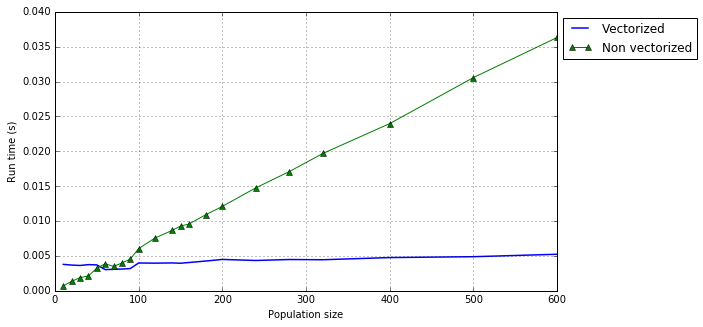

In [12]:
v_times = [time_obj.best for time_obj in vectorized_times]
non_v_times = [time_obj.best for time_obj in non_vectorized_times]
line_vectorized, = plt.plot(p_sizes, v_times, linewidth=1.5, label='Vectorized')
line_non_vectorized, = plt.plot(p_sizes, non_v_times, label='Non vectorized', marker='^')
# plt.ylim((-0.01, 1.05))
# plt.xlim((-0.1, 125))
plt.legend(handles=[line_vectorized, line_non_vectorized], loc='upper left', bbox_to_anchor=(1,1))
plt.grid(b=True, which='both')
plt.rcParams["figure.figsize"][0] = 9
plt.rcParams["figure.figsize"][1] = 5
# plt.xticks([10*i for i in range(13)])
# plt.yticks([0.1*i for i in range(11)])
plt.ylabel('Run time (s)')
plt.xlabel('Population size')
plt.show()

## Investigate Cython speedup

In [17]:
runs = 1
generations = 3*np.power(10, 2)
population_size = 10
socialnorm = np.array([[0, 0], [0, 1]])
mutation_rate = np.power(10.0*population_size, -1.0)

execution_error = 0.08
reputation_assignment_error = 0.01
private_assessment_error = 0.01
reputation_update_probability = 1.0
cost = 1
benefit = 5

In [18]:
%%timeit
sim_cyth.simulation_instance.run_instance(runs, generations, population_size, mutation_rate,
                              execution_error, reputation_assignment_error,
                              private_assessment_error, reputation_update_probability,
                              socialnorm, cost, benefit)

1 loop, best of 3: 517 ms per loop


In [19]:
%%timeit
SimulationInstance.simulate(runs, generations, population_size, mutation_rate,
                            execution_error, reputation_assignment_error,
                            private_assessment_error, reputation_update_probability,
                            socialnorm, cost, benefit)

1 loop, best of 3: 2.4 s per loop


In [29]:
cython_time_objects = []
pure_python_time_objects = []
python_vectorized_time_objects = []
p_sizes = [5, 10, 20, 30, 40, 50, 60, 70, 90, 110, 130, 160, 180]
for p_size in p_sizes:
    population_size = p_size
    variables = InstanceVariables(runs, generations, population_size, mutation_rate,
                                  execution_error, reputation_assignment_error,
                                  private_assessment_error, reputation_update_probability,
                                  socialnorm, cost, benefit)
    cython_result = %timeit -r 1 -o sim_cyth.simulation_instance.run_instance(runs, generations, population_size, mutation_rate, \
                            execution_error, reputation_assignment_error, \
                            private_assessment_error, reputation_update_probability, \
                            socialnorm, cost, benefit)
    pure_python_result = %timeit -r 1 -o SimulationInstance.simulate(runs, generations, population_size, mutation_rate, \
                            execution_error, reputation_assignment_error, \
                            private_assessment_error, reputation_update_probability, \
                            socialnorm, cost, benefit)
    pyth_vector_result = %timeit -r 1 -o SimulationInstanceVectorized.run_instance(runs, generations, population_size, mutation_rate, \
                            execution_error, reputation_assignment_error, \
                            private_assessment_error, reputation_update_probability, \
                            socialnorm, cost, benefit)
    cython_time_objects.append(cython_result)
    pure_python_time_objects.append(pure_python_result)
    python_vectorized_time_objects.append(pyth_vector_result)

10 loops, best of 1: 85.1 ms per loop
1 loop, best of 1: 307 ms per loop
1 loop, best of 1: 2.25 s per loop
1 loop, best of 1: 221 ms per loop
1 loop, best of 1: 966 ms per loop
1 loop, best of 1: 4.68 s per loop
1 loop, best of 1: 743 ms per loop
1 loop, best of 1: 3.36 s per loop
1 loop, best of 1: 10 s per loop
1 loop, best of 1: 1.75 s per loop
1 loop, best of 1: 7.16 s per loop
1 loop, best of 1: 15.2 s per loop
1 loop, best of 1: 3.36 s per loop
1 loop, best of 1: 12 s per loop
1 loop, best of 1: 20.8 s per loop
1 loop, best of 1: 5.8 s per loop
1 loop, best of 1: 18.5 s per loop
1 loop, best of 1: 26.1 s per loop
1 loop, best of 1: 9.26 s per loop
1 loop, best of 1: 26.4 s per loop
1 loop, best of 1: 33.9 s per loop
1 loop, best of 1: 14.8 s per loop
1 loop, best of 1: 37.7 s per loop
1 loop, best of 1: 39.3 s per loop


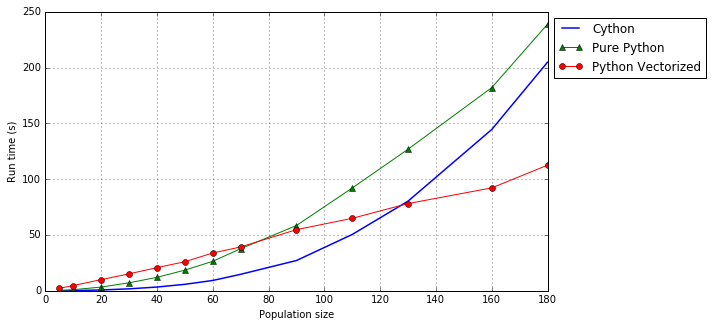

In [34]:
cyth_times = [time_obj.best for time_obj in cython_time_objects]
pure_pyth_times = [time_obj.best for time_obj in pure_python_time_objects]
pyth_vector_times = [time_obj.best for time_obj in python_vectorized_time_objects]
line_cyth, = plt.plot(p_sizes, cyth_times, linewidth=1.5, label='Cython')
line_pure_pyth, = plt.plot(p_sizes, pure_pyth_times, label='Pure Python', marker='^')
line_vectorized, = plt.plot(p_sizes, pyth_vector_times, label='Python Vectorized', marker='o')
# plt.ylim((-0.01, 1.05))
# plt.xlim((-0.1, 125))
plt.legend(handles=[line_cyth, line_pure_pyth, line_vectorized], loc='upper left', bbox_to_anchor=(1,1))
plt.grid(b=True, which='both')
plt.rcParams["figure.figsize"][0] = 9
plt.rcParams["figure.figsize"][1] = 5
# plt.xticks([10*i for i in range(13)])
# plt.yticks([0.1*i for i in range(11)])
plt.ylabel('Run time (s)')
plt.xlabel('Population size')
plt.show()